In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_url ='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv' 
data = pd.read_csv(file_url)

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
data['class'].unique()

array([0, 1, 2], dtype=int64)

In [7]:
data['class'].nunique()

3

<Axes: xlabel='class', ylabel='count'>

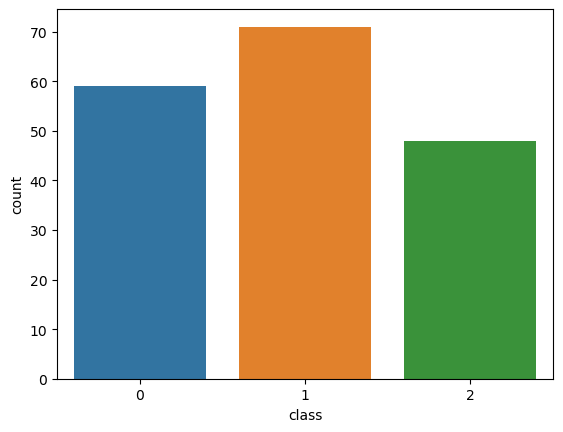

In [12]:
sns.barplot(x=data['class'].value_counts().index, y=data['class'].value_counts())

In [13]:
data['class'].value_counts().index

Index([1, 0, 2], dtype='int64', name='class')

<Axes: xlabel='class', ylabel='count'>

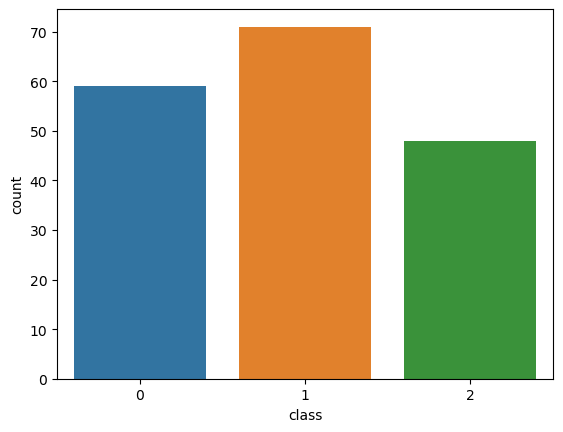

In [16]:
sns.countplot(data, x='class')

In [18]:
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [19]:
data.isna().mean()

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [20]:
data.fillna(data.median(), inplace = True)
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [27]:
st_scater=StandardScaler()
st_scater.fit(data)
st_scaled = st_scater.transform(data)
st_scaled=pd.DataFrame(st_scaled, columns = data.columns)
round(st_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [29]:
rb_scaler = RobustScaler()
rb_scaled = rb_scaler.fit_transform(data)
rb_scaled = pd.DataFrame(rb_scaled, columns = data.columns)
round(rb_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [30]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_scaled = pd.DataFrame(mm_scaled, columns= data.columns)
round(mm_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [33]:
X=data.drop('class', axis=1)
y=data['class']
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

In [36]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [37]:
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

In [39]:
accuracy_score(y_test, pred)

0.8888888888888888

In [43]:
score=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train_scaled, y_train)
    pred=knn.predict(X_test_scaled)
    score.append(accuracy_score(y_test,pred))

C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

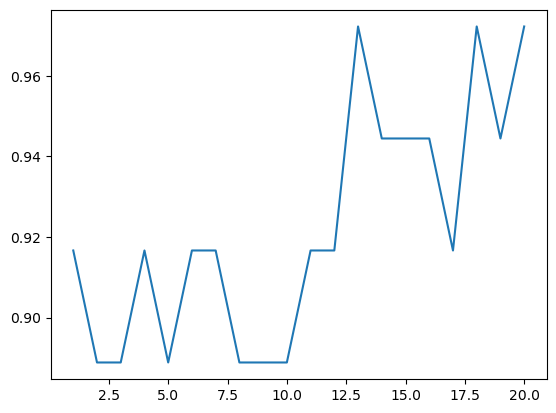

In [44]:
sns.lineplot(x=range(1,21), y=score)